# Student's t-distribution
(C) 2018 Dariusz Kajtoch

---
If we have a random sample $x_1, \ldots, x_n \sim \mathcal{N}(\mu,\sigma^2)$, drawn from a Normal distribution, then a random variable $Z_n$, defined as
$$Z_n = \frac{\bar{X}_n - \mu}{S_n}\sqrt{n},$$
has a Student's t-distribution $\mathcal{T}(x|0,1,n-1)$, with $n-1$ degrees of freedom. 
In the equation, $\bar{X}_n = \frac{1}{n}\sum_{i=1}^{n}x_i$ is an unbiased estimator of the mean and $S_n^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{X}_n)^2$ is an unbiased estimator of the variance.

On the other hand, a random variable 
$$\tilde{Z}_n = \frac{\bar{X}_n - \mu}{\sigma}\sqrt{n},$$
has a Normal distribution $\mathcal{N}(x|0,1)$.

---
We will also test if it is justified to model $Z_n$ with a Student't t-distribution for other distributions like e.g. exponential distribution.

---


**Mathematical background**

Student's t-distribution:
$$\mathcal{T}(x|\mu,\sigma^2,\nu) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)}\frac{1}{\sqrt{\pi \nu \sigma^2}}\left[1 + \frac{(x-\mu)^2}{\nu\sigma^2} \right]^{-\frac{\nu+1}{2}}$$
Normal distribution:
$$\mathcal{N}(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2} \right]$$
Exponential distribution:
$$\text{Exp}(x|\lambda) = \lambda \exp\left(-\lambda x \right), \ \ x\geqslant 0$$
Gamma distribution:
$$\text{Ga}(x|\alpha,\beta) = \frac{\beta^{\alpha}}{\Gamma(\alpha)}x^{\alpha-1}e^{-\beta x}, \ \ x>0, \alpha,\beta>0$$

# Table of contents
1. [Random sample from Normal distribution](#example1)
2. [Random sample from Exponential distribution](#example2)
3. [Q-Q plot of the t-distribution vs normal distribution](#example3)
4. [Comparison of the Normal and t-distribution](#example4) 
5. [Scaling of the intersection point between t-distribution and normal distribution](#example5)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy.special import gamma
import statsmodels.api as sm

# customize plot style
sns.set_style('white')
sns.set_context('notebook')

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# colors
color_map = plt.get_cmap('tab10').colors

# 1. Independent random sample from Normal distribution<a name=example1 />

In [2]:
def statisticNormal( mu, sigma, n, size=10000 ):
    """ Calculation of the sampling distribution of ranodom variable 
    (X - mu)/( S/sqrt(n) ), where X - unbiased estimator of the mean and
    S - unbiased estimator of the standard deviation
    
    Parameters
    ==========
    
    mu: float
        expectation value of the normal distribution
    sigma: float
        standard deviation of the normal distribution
    n: int
        sample size
    size: int
        number of samples 
        
    Returns
    =======
    
    random_variable: ndarray
        Array of size 'size' with random variable (X-mu)/(S/sqrt(n))
    """
    
    random_variable = np.zeros( size, dtype=np.float64 )
    
    for i in range(0,size):
        # genrerate random numbers from normal distribution
        sample = np.random.normal( mu, sigma, n )
        # calculate unbiased estimator of the mean
        est_mean = np.mean( sample )
        # calculate unbiased estimator of the variance
        # numpy var is biased
        est_var = np.var( sample ) * n/(n-1.)
        
        random_variable[i] = ( est_mean - mu)/np.sqrt( est_var/n ) 
        
    return random_variable

def statisticExponential( scale, n, size=10000 ):
    """ Calculation of the sampling distribution of random variable 
    (X - mu)/( S/sqrt(n) ), where X - unbiased estimator of the mean and
    S - unbiased estimator of the standard deviation
    
    Parameters
    ==========
    
    scale: float
        scale parameter of the exponential distribution
    n: int
        sample size
    size: int
        number of samples 
        
    Returns
    =======
    
    random_variable: ndarray
        Array of size 'size' with random variable (X-mu)/(S/sqrt(n))
    """
    
    random_variable = np.zeros( size, dtype=np.float64 )
    
    for i in range(0,size):
        # genrerate random numbers from normal distribution
        sample = np.random.exponential( scale=scale, size=n )
        # calculate unbiased estimator of the mean
        est_mean = np.mean( sample )
        # calculate unbiased estimator of the variance
        # numpy var is biased
        est_var = np.var( sample ) * n/(n-1.)
        
        random_variable[i] = ( est_mean - scale)/np.sqrt( est_var/n ) 
        
    return random_variable

def normalPDF( x, mu, sigma ):
    """ Calculates PDF of the normal distribution at point 'x'  
    
    Parameters
    ==========
    
    x: float
        x value of the function
    mu: float
        expectation value of the normal distribution
    sigma: float
        standard deviation of the normal distribution
        
    Returns
    =======
    
    val: float
        Value of the PDF at point 'x'
    """
    
    return 1./np.sqrt( 2.*np.pi*sigma**2) * np.exp( -0.5*(x - mu)**2/sigma**2 )

def studentPDF( x, nu ):
    """ Calculates PDF of the Student's t-distribution at point 'x'  
    
    Parameters
    ==========
    
    x: float
        x value of the function
    nu: int or float
        number of degrees of freedom
        
    Returns
    =======
    
    val: float
        Value of the PDF at point 'x'
    """
    
    return gamma( (nu+1.)/2. )/gamma( nu/2. ) * 1./np.sqrt(np.pi * nu) * 1./np.power( (1.+x**2/nu), (nu+1.)/2. )

In [228]:
# generate the sample
sample = statisticNormal( mu=0.0, sigma=2.0, n=4 )
print( ( np.abs( sample ) > 20. ).sum() )

2


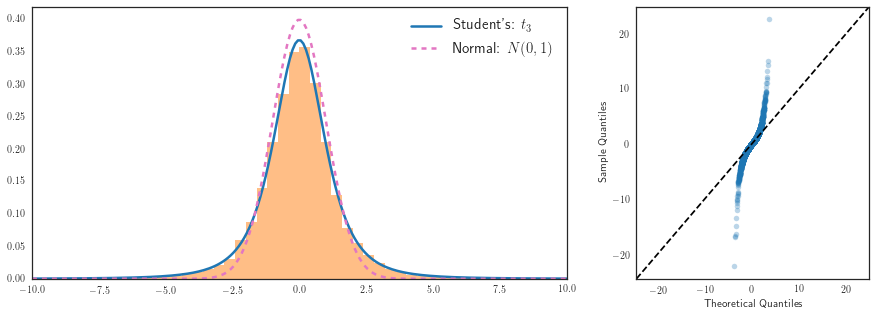

In [232]:
plt.close()

fig = plt.figure( figsize=(15,5) )

gs = GridSpec( nrows=1, ncols=3, figure=fig )
gs.update( wspace=0.3 )

# 1st Figure
# ==========
ax = fig.add_subplot( gs[0,:2] )

count, bins, patches = ax.hist( sample, 
                                bins=100, 
                                density=True, 
                                range=(-20,20),
                                alpha=0.5,
                                color=color_map[1]
                              )

x = np.linspace(-10,10,200)
ax.plot( x, studentPDF( x, nu=3. ), lw=2.5, c=color_map[0], label="Student's: $t_3$" )
ax.plot( x, normalPDF( x, mu=0., sigma=1.0 ), lw=2.5, c=color_map[6], dashes=[2,2], label="Normal: $N(0,1)$" )

ax.set_xlim(-10,10)

ax.legend( loc='best', fontsize=15 )

# 2nd Figure
# ==========
ax = fig.add_subplot( gs[0,2] )

fig = sm.qqplot( sample, 
                 ax=ax, 
                 marker='o',
                 markersize = 5.5,
                 markerfacecolor = color_map[0],
                 alpha = 0.3
               )
sm.qqline( ax=ax, line='45', fmt='k--' )

# export figure
plt.savefig( 'fig1.pdf', bbox_inches='tight', dpi=100)
#plt.savefig( 'fig1.eps', bbox_inches='tight', dpi=100)
plt.savefig( 'fig1.png', bbox_inches='tight', dpi=600)

In [233]:
# generate the sample
sample = statisticNormal( mu=0.0, sigma=2.0, n=10 )
print( ( np.abs( sample ) > 5. ).sum() )

10


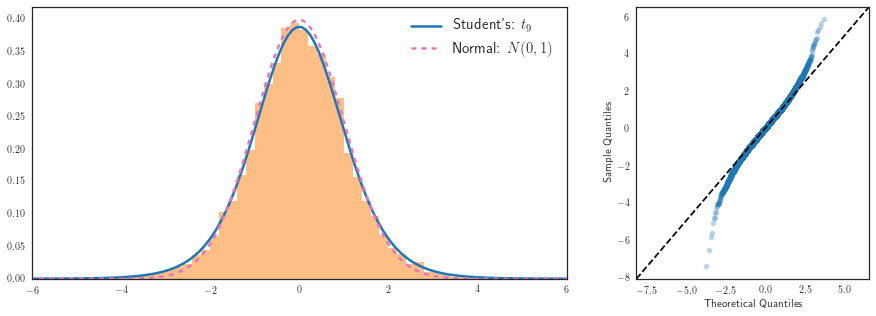

In [234]:
plt.close()

fig = plt.figure( figsize=(15,5) )

gs = GridSpec( nrows=1, ncols=3, figure=fig )
gs.update( wspace=0.3 )

# 1st Figure
# ==========
ax = fig.add_subplot( gs[0,:2] )

count, bins, patches = ax.hist( sample, 
                                bins=100, 
                                density=True, 
                                range=(-10,10),
                                alpha=0.5,
                                color=color_map[1]
                              )

x = np.linspace(-10,10,200)
ax.plot( x, studentPDF( x, nu=9. ), lw=2.5, c=color_map[0], label="Student's: $t_9$" )
ax.plot( x, normalPDF( x, mu=0., sigma=1.0 ), lw=2.5, c=color_map[6], dashes=[2,2], label="Normal: $N(0,1)$" )

ax.set_xlim(-6,6)

ax.legend( loc='best', fontsize=15 )

# 2nd Figure
# ==========
ax = fig.add_subplot( gs[0,2] )

fig = sm.qqplot( sample, 
                 ax=ax, 
                 marker='o',
                 markersize = 5.5,
                 markerfacecolor = color_map[0],
                 alpha = 0.3
               )
sm.qqline( ax=ax, line='45', fmt='k--' )


# export figure
plt.savefig( 'fig2.pdf', bbox_inches='tight', dpi=100)
#plt.savefig( 'fig1.eps', bbox_inches='tight', dpi=100)
plt.savefig( 'fig2.png', bbox_inches='tight', dpi=600)

# 2. Independent random sample from exponential distribution<a name=example2 />

In [235]:
# generate the sample
sample = statisticExponential( scale=1.0, n=10 )
print( ( np.abs( sample ) > 10. ).sum() )

14


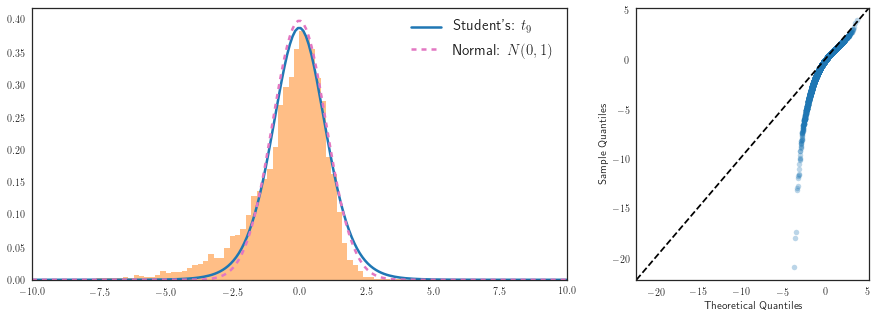

In [236]:
plt.close()

fig = plt.figure( figsize=(15,5) )

gs = GridSpec( nrows=1, ncols=3, figure=fig )
gs.update( wspace=0.3 )

# 1st Figure
# ==========
ax = fig.add_subplot( gs[0,:2] )

count, bins, patches = ax.hist( sample, 
                                bins=100, 
                                density=True, 
                                range=(-10,10),
                                alpha=0.5,
                                color=color_map[1]
                              )

x = np.linspace(-10,10,200)
ax.plot( x, studentPDF( x, nu=9. ), lw=2.5, c=color_map[0], label="Student's: $t_9$" )
ax.plot( x, normalPDF( x, mu=0., sigma=1.0 ), lw=2.5, c=color_map[6], dashes=[2,2], label="Normal: $N(0,1)$" )

ax.set_xlim(-10,10)

ax.legend( loc='best', fontsize=15 )

# 2nd Figure
# ==========
ax = fig.add_subplot( gs[0,2] )

fig = sm.qqplot( sample, 
                 ax=ax, 
                 marker='o',
                 markersize = 5.5,
                 markerfacecolor = color_map[0],
                 alpha = 0.3
               )
sm.qqline( ax=ax, line='45', fmt='k--' )

# export figure
plt.savefig( 'fig3.pdf', bbox_inches='tight', dpi=100)
#plt.savefig( 'fig1.eps', bbox_inches='tight', dpi=100)
plt.savefig( 'fig3.png', bbox_inches='tight', dpi=600)

# 3. Theoretical Q-Q Plot<a name=example3 \>

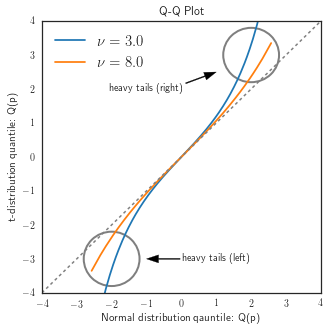

In [10]:
from scipy.stats import t, norm

quantiles = np.linspace(0.0,1.0,200)

Normal  = norm()
normal_tab  = Normal.ppf( quantiles )

plt.close()

fig, ax = plt.subplots( figsize=(5,5) )


student_tab = t.ppf( quantiles, df=3.0 )
ax.plot( normal_tab, student_tab, c=color_map[0], label="$\\nu = 3.0$" )

student_tab = t.ppf( quantiles, df=8.0 )
ax.plot( normal_tab, student_tab, c=color_map[1], label="$\\nu = 8.0$" )

ax.plot( [-4,4], [-4,4], lw=1.5, c='0.5', dashes=[2,2] )

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)

ax.set_title('Q-Q Plot')
ax.set_xlabel('Normal distribution qauntile: Q(p)')
ax.set_ylabel('t-distribution quantile: Q(p)')

ax.legend(fontsize=15)

# Annotate figure
circle1 = plt.Circle( (-2,-3), 0.8, 
                      color=color_map[7], 
                      fill=False,
                      linewidth=2.
                    )
circle2 = plt.Circle( (2,3), 0.8, 
                      color=color_map[7], 
                      fill=False,
                      linewidth=2.
                    )
ax.add_artist( circle1 )
ax.add_artist( circle2 )

ax.annotate( 'heavy tails (left)', xy=(-1, -3), xytext=(1, -3),
             arrowprops=dict(facecolor='k', width=1., headwidth=8.),
             horizontalalignment='center', 
             verticalalignment='center'
            )

ax.annotate( 'heavy tails (right)', xy=(1, 2.5), xytext=(-1, 2),
             arrowprops=dict(facecolor='k', width=1., headwidth=8.),
             horizontalalignment='center', 
             verticalalignment='center'
            )

# export figure
#plt.savefig( 'fig4.pdf', bbox_inches='tight', dpi=100)
#plt.savefig( 'fig1.eps', bbox_inches='tight', dpi=100)
plt.savefig( 'fig4.png', bbox_inches='tight', dpi=600)

# 4. Normal vs t-distribution<a name=example4 />

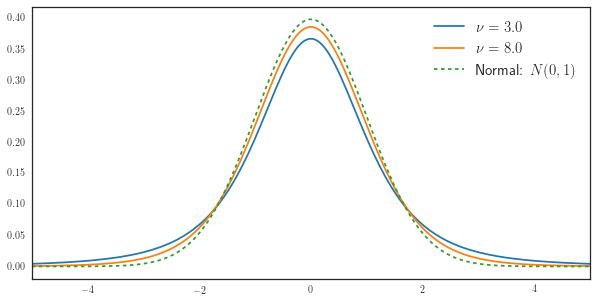

In [244]:
# Plot Normal and Student's t-distribution
from scipy.stats import t, norm

Normal  = norm()

plt.close()

fig, ax = plt.subplots( figsize=(10,5) )


x = np.linspace(-5,5,200)
Student = t(df=3.0)
ax.plot( x, Student.pdf(x), c=color_map[0], label="$\\nu = 3.0$" )

Student = t(df=8.0)
ax.plot( x, Student.pdf(x), c=color_map[1], label="$\\nu = 8.0$" )

ax.plot( x, Normal.pdf(x), c=color_map[2], dashes=[2,2], label="Normal: $N(0,1)$" )

ax.set_xlim(-5,5)

ax.legend(fontsize=15)

# export figure
plt.savefig( 'fig5.pdf', bbox_inches='tight', dpi=100)
#plt.savefig( 'fig1.eps', bbox_inches='tight', dpi=100)
plt.savefig( 'fig5.png', bbox_inches='tight', dpi=600)

# 5. Scaling of the intersection point between t-distribution and Normal distribution <a name=example5 />

We are looking for a point $x_\nu$ such that
$$\mathcal{T}(x_\nu|0,1,\nu) = \mathcal{N}(x_\nu|0,1).$$

In [6]:
from scipy.optimize import bisect

def fun(x, nu):
    return normalPDF(x,0.,1.) - studentPDF(x,nu)

nu_tab = np.linspace(1.,20.,20)

root = np.array([])
for nu in nu_tab:
    sol = bisect( fun, a=0.0, b=3.0, args=(nu) )
    
    root = np.append( root, sol )

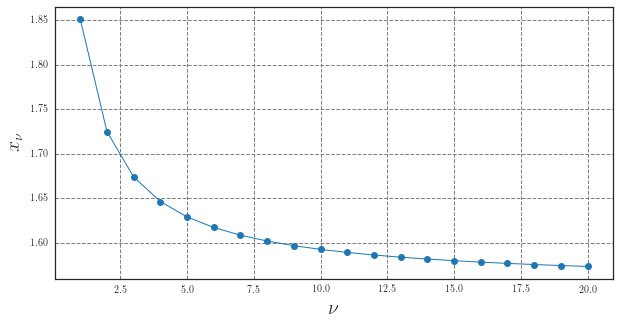

In [20]:
plt.close()

fig, ax = plt.subplots( figsize=(10,5) )

ax.plot( nu_tab, root, lw=1, marker='o', c=color_map[0] )

ax.set_xlabel('$\\nu$', fontsize=20)
ax.set_ylabel('$x_{\\nu}$', fontsize=20)

ax.grid(linestyle='--', color='0.5', lw=1)

#ax.set_xscale('log')
#ax.set_yscale('log')

# export figure
#plt.savefig( 'fig6.pdf', bbox_inches='tight', dpi=100)
#plt.savefig( 'fig1.eps', bbox_inches='tight', dpi=100)
plt.savefig( 'fig6.png', bbox_inches='tight', dpi=600)